#### Week 5: Feature Engineering
* **Project Title:** Feature Engineering for Predictive Modeling
* **Description:** Select a dataset and perform feature engineering to improve model performance. Create new features, select important ones, and evaluate their impact.
* **Dataset Reference:** Kaggle House Prices Dataset

#### Feature Engineering for Predictive Modeling of House Prices


### **Steps Involved in the Project:**

1. **Dataset Selection:**
   - Choose a dataset that involves predicting a continuous target variable, such as housing prices, sales forecasts, or stock prices.
   - From the **housing price dataset**, the target variable is `price`, and the predictors include features like **area**, **bedrooms**, **bathrooms**, **stories**, and **parking**.

2. **Data Preprocessing:**

3. **Feature Engineering:**
   - **Create new features**: Generate features that can capture more information:
     - **Price per square meter**: `price / area`
     - **Total rooms**: Sum of `bedrooms` and `bathrooms`
     - **Area per bedroom**: `area / bedrooms`
     - **Price per bedroom**: `price / bedrooms`
   - **Interaction features**: Combine two or more features to capture interactions. For example:
     - Interaction between `area` and `stories`.
     - Interaction between `bathrooms` and `bedrooms`.
   - **Categorical Encoding**: Convert categorical features (if any) into numerical values using techniques like One-Hot Encoding or Label Encoding.

4. **Feature Selection:**
   - **Importance Ranking**: Identify which features have the most predictive power by using feature importance methods such as:
     - **Random Forest** feature importance.
     - **XGBoost** feature importance.
   - **Correlation Matrix**: Identify highly correlated features to avoid multicollinearity. Features that are highly correlated can be dropped or combined.

5. **Model Building and Evaluation:**
   - **Baseline Model**: I Start with simple models like **Random Forest** to check the initial performance (RMSE).
   - **Hyperparameter Tuning**: I apply **GridSearchCV** techniques to fine-tune hyperparameters and improve model performance.
   - **Ensemble Methods**: Consider using ensemble models like **XGBoost** to leverage different learning approaches and improve performance.

6. **Model Performance Metrics:**
   - **Root Mean Squared Error (RMSE)** is the primary metric to evaluate model performance, and the goal is to minimize it.
 

### 1. Study the dataset:
#### 1.1 Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

#### 1.2 Load and Inspect the Data

In [3]:
df = pd.read_csv('Housing2.csv')


In [35]:
print(f"Shape: {df.shape}")
df.head()

Shape: (545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#### 1.3 Basic Data Summary

In [36]:
# Data types and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [79]:
df.columns.values

array(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'], dtype=object)

In [37]:
# Summary statistics
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [38]:
# Check for missing values
missing = df.isnull().sum()
print("Missing Values:\n", missing[missing > 0])

Missing Values:
 Series([], dtype: int64)


#### 1.4 Target Distribution

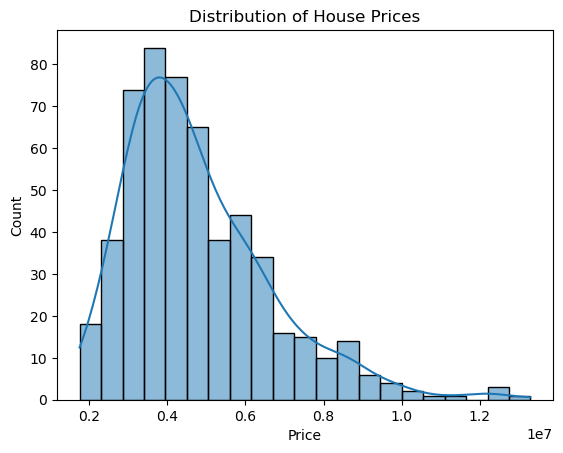

In [39]:
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


#### 1.5 Correlation Matrix (Numerical Features Only)

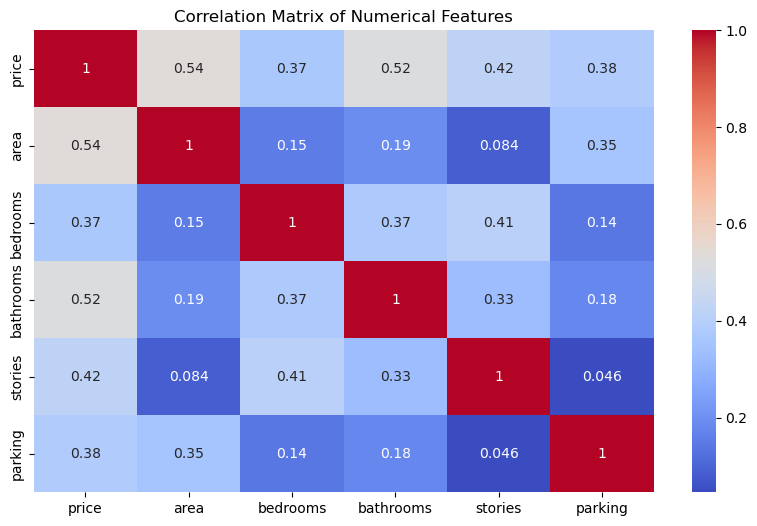

In [40]:
numeric_cols = df.select_dtypes(include=np.number).columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [4]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Compute correlation with 'price'
corr = numerical_df.corr()['price'].sort_values(ascending=False)

# Print top correlated features (excluding 'price' itself if needed)
print("Top correlated features with price:\n", corr.drop('price'))


Top correlated features with price:
 area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64


* **Area:** 0.536 – Strong positive correlation with price. As the area increases, the price tends to increase.

* **Bathrooms:** 0.518 – Strong positive correlation with price. More bathrooms are associated with higher prices.

* **Stories:** 0.421 – Moderate positive correlation with price. Houses with more stories are likely to have higher prices.

* **Parking:** 0.384 – Moderate positive correlation with price. More parking spaces tend to increase the price.

* **Bedrooms**: 0.366 – Moderate positive correlation with price. More bedrooms slightly increase the price.

* This could guide feature selection for model building, emphasizing these features for price prediction tasks.

### 2: Exploratory Data Analysis (EDA)

* Understand the distribution of features

* Spot correlations with the target variable (price)

* Handle missing or skewed data

* Examine relationships between categorical variables and price

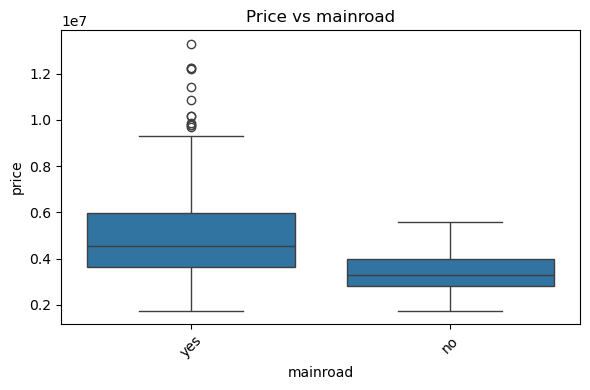

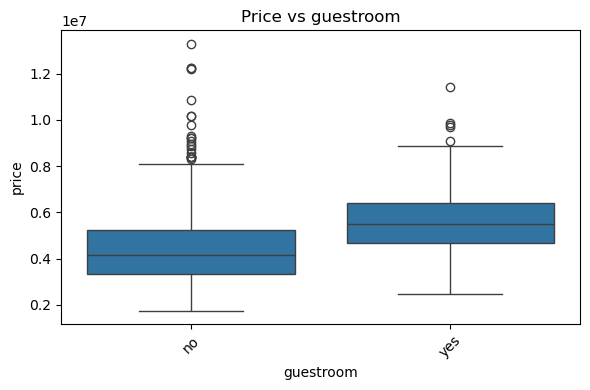

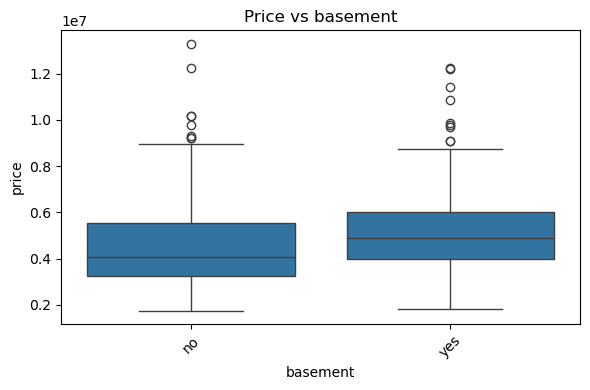

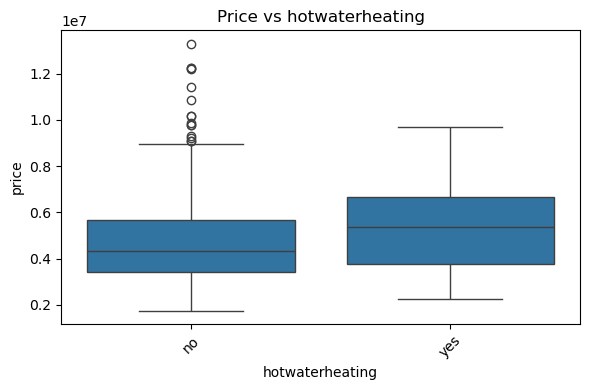

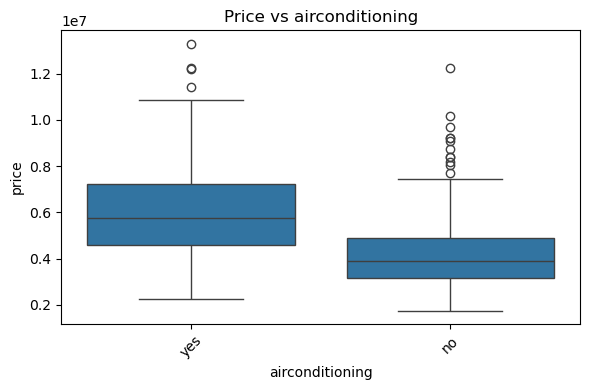

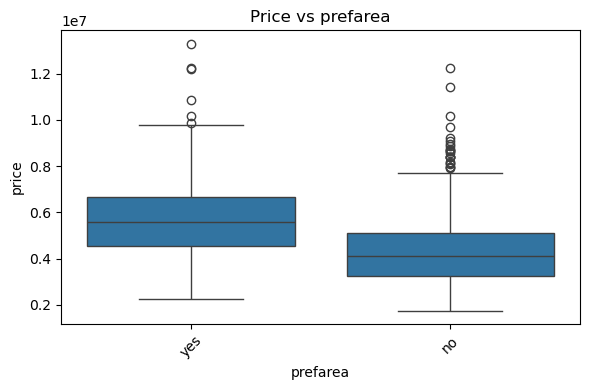

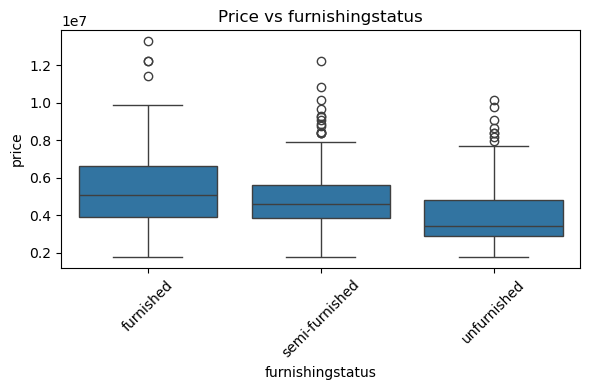

In [81]:
# View categorical and numerical features
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include=np.number).columns.drop('price')

# Boxplots for categorical vs price
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=col, y='price')
    plt.title(f'Price vs {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#### 3: Feature Engineering


##### 3.1 Transform Binary Categorical Variables
* Convert yes/no to 1/0:

In [5]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
               'airconditioning', 'prefarea']

df[binary_cols] = df[binary_cols].replace({'yes': 1, 'no': 0})


C:\Users\smith\AppData\Local\Temp\ipykernel_10852\1263756596.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'yes': 1, 'no': 0})


#### 3.2 One-Hot Encode Multiclass Categorical Variables

In [6]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)


#### perfomance metric before creating new features

In [7]:
# Original data
X = df.drop('price', axis=1)
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Prediction & RMSE
y_pred = model.predict(X_test)
rmse_before = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE before feature engineering RandomForest: {rmse_before:.2f}')

RMSE before feature engineering RandomForest: 1401496.84


#### 3.3 Create New Features

In [11]:
# Price per area
df['price_per_sqft'] = df['price'] / df['area']

# Total rooms (bedrooms + bathrooms)
df['total_rooms'] = df['bedrooms'] + df['bathrooms']

# Interaction feature: parking * stories
df['parking_stories'] = df['parking'] * df['stories']


#### 4: Feature Selection
##### 4.1 Correlation with Target

In [12]:
corr = df.corr()['price'].sort_values(ascending=False)
print("Top correlated features:\n", corr)

Top correlated features:
 price                              1.000000
area                               0.535997
bathrooms                          0.517545
total_rooms                        0.511809
parking_stories                    0.487322
airconditioning                    0.452954
stories                            0.420712
price_per_sqft                     0.392921
parking                            0.384394
bedrooms                           0.366494
prefarea                           0.329777
mainroad                           0.296898
guestroom                          0.255517
basement                           0.187057
hotwaterheating                    0.093073
furnishingstatus_semi-furnished    0.063656
furnishingstatus_unfurnished      -0.280587
Name: price, dtype: float64


#### 4.2 Use Feature Importance
##### a. Random Forest

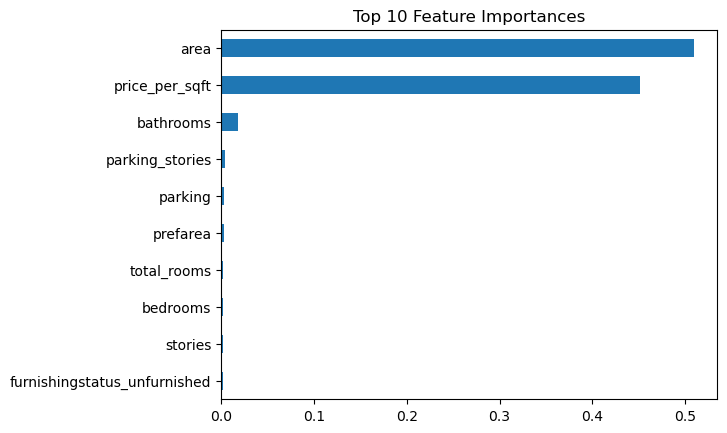

In [13]:
X = df.drop('price', axis=1)
y = df['price']

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Get feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Plot
importances.head(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()


##### b. XGBRegressor

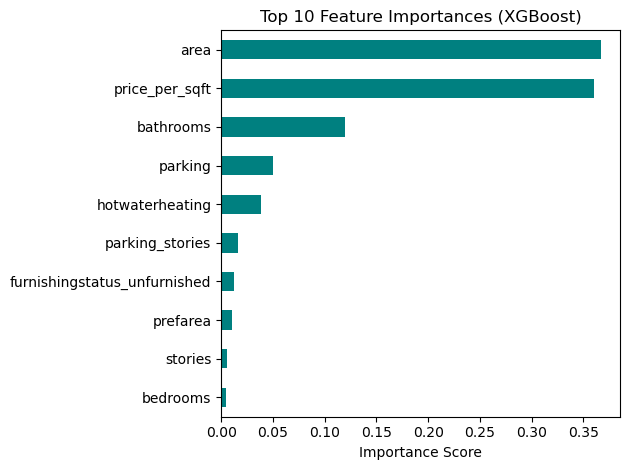

In [14]:
from xgboost import XGBRegressor

# Define features and target
X = df.drop('price', axis=1)
y = df['price']

# Initialize and fit XGBoost Regressor
model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
model.fit(X, y)

# Get feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Plot top 10 important features
importances.head(10).plot(kind='barh', color='teal')
plt.title('Top 10 Feature Importances (XGBoost)')
plt.gca().invert_yaxis()
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


### 5: Model Evaluation
* Train/test split and evaluate model before vs. after feature engineering.

In [15]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE after feature engineering: {rmse:.2f}')


RMSE after feature engineering: 574881.11


In [16]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE after feature engineering: {rmse:.2f}')

RMSE after feature engineering: 545522.79


* To rewrite my code using hyperparameter tuning, apply GridSearchCV from Scikit-learn to search for the optimal hyperparameters.

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
RMSE after hyperparameter tuning: 431991.63


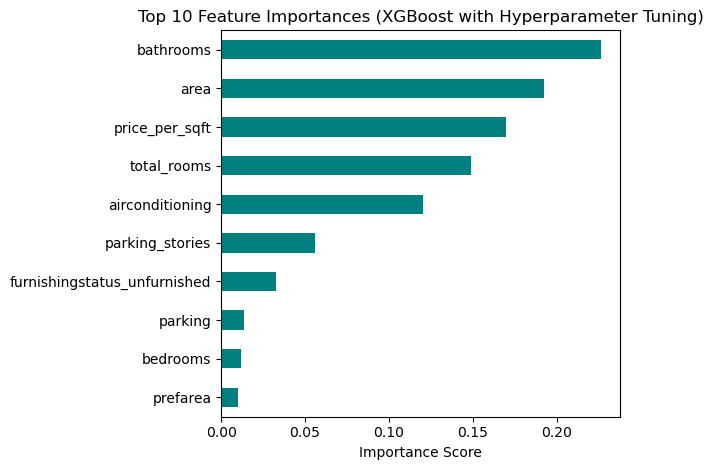

In [17]:
# Define features and target
X = df.drop('price', axis=1)
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize XGBoost Regressor
xgb = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict with the best model
y_pred = best_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE after hyperparameter tuning: {rmse:.2f}')

# Get feature importances
importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Plot top 10 important features
importances.head(10).plot(kind='barh', color='teal')
plt.title('Top 10 Feature Importances (XGBoost with Hyperparameter Tuning)')
plt.gca().invert_yaxis()
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


In [75]:
# Best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}


* **RandomForestRegressor:** After feature engineering, the RMSE is 574,881.11.

* **XGBRegressor:** After feature engineering, the RMSE is 545,522.79.

* **GridSearchCV** RMSE after hyperparameter tuning: 431991.63

**Interpretation:**
* XGBRegressor has performed better than the RandomForestRegressor in terms of RMSE, as a lower RMSE indicates better model performance.
* XGBRegressor is the better-performing model compared to RandomForestRegressor, as it has a lower RMSE both before and after feature engineering.

* Hyperparameter tuning with GridSearchCV improves the performance of the XGBRegressor, lowering the RMSE from 545,522.79 to 431,991.63.

* This demonstrates the importance of tuning hyperparameters to enhance model accuracy and optimize predictions.

### 6. **Insights and Conclusion**
1. Feature engineering plays a crucial role in improving model performance by creating new features, selecting important ones, and transforming existing ones. The goal of this project is to enhance the predictive power of models, such as **Random Forest** and **XGBoost**, through the creation and selection of informative features. The ultimate aim is to reduce the model's **Root Mean Squared Error (RMSE)**, a metric that quantifies the difference between predicted and actual values.

2. The initial **Random Forest**(1,401,496.84) model is not very good, indicating that there is room for improvement. This could be due to the lack of feature engineering or an insufficient selection of important features. After performing feature engineering (such as creating new features like price per square meter, total rooms, and interaction terms), the model's performance significantly improved. The RMSE(574,881.11) is reduced by more than half, which is a strong indication that feature engineering was beneficial.

3. **RMSE(545,522.79) After Feature Engineering (XGBoost):** The XGBoost model performed slightly better than Random Forest after feature engineering. 

4. **RMSE(431,991.63) After Hyperparameter Tuning (GridSearchCV):** Hyperparameter tuning using **GridSearchCV** led to further improvements in RMSE. This indicates that the model could still benefit from tuning the hyperparameters, such as tree depth, learning rate, or regularization parameters.

